# Questionnaire Data Analysis: Individual vs Joint RL

Analysis focusing on:
- **AI Detection** (from AI-like to Human-like)
- **Collaboration Rating** (from Poor to Excellent)
- **Play Again Intention** (from Negative to Positive)

Comparing **Individual vs Joint RL** conditions with properly ordered x-axes and frequency on y-axis.


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import glob

# Set plotting style
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Set color palette - lightblue for individual, lightcoral for joint RL
colors = {'individual': 'lightblue', 'joint': 'lightcoral'}
bar_colors = ['lightblue', 'lightcoral']  # for individual and joint RL
sns.set_palette([colors['individual'], colors['joint']])

print("Libraries loaded successfully!")

Libraries loaded successfully!


## Data Loading and Preprocessing


**Integrated experimental condition extraction** - This cell automatically:
1. Loads all experiment data files
2. Extracts experimental conditions
3. Merges questionnaire data with conditions
4. Prepares data for analysis

In [ ]:
# Load and extract experimental conditions and questionnaire data
print("🔍 Loading experiment data files and extracting conditions...")

# Load all xlsx files from data directory
data_files = glob.glob('kids/experiment_data_*.xlsx')
print(f"Found {len(data_files)} experiment data files")

# Initialize list to store experimental conditions
all_experimental_data = []
all_questionnaire_data = []

for file in data_files:
    try:
        # Read all sheets to understand structure
        excel_file = pd.ExcelFile(file)
        print(f"\n{os.path.basename(file)} sheets: {excel_file.sheet_names}")

        # Try to read experimental data sheet
        if 'Experiment Data' in excel_file.sheet_names:
            exp_df = pd.read_excel(file, sheet_name='Experiment Data')
            exp_df['file_id'] = os.path.basename(file)
            all_experimental_data.append(exp_df)
            print(f"  Experiment data: {exp_df.shape}")

        # Read questionnaire data
        if 'Questionnaire Data' in excel_file.sheet_names:
            quest_df = pd.read_excel(file, sheet_name='Questionnaire Data')
            quest_df['file_id'] = os.path.basename(file)
            all_questionnaire_data.append(quest_df)
            print(f"  Questionnaire data: {quest_df.shape}")

    except Exception as e:
        print(f"Error loading {file}: {e}")

# Combine experimental data
if all_experimental_data:
    experimental_df = pd.concat(all_experimental_data, ignore_index=True)
    print(f"\nTotal experimental data rows: {len(experimental_df)}")
    print(f"Experimental data columns: {list(experimental_df.columns)}")

    # Look for condition-related columns
    condition_cols = [col for col in experimental_df.columns if any(keyword in col.lower()
                      for keyword in ['condition', 'rl', 'individual', 'joint', 'treatment', 'group'])]
    print(f"\nPotential condition columns: {condition_cols}")

    # Show unique values for condition columns
    for col in condition_cols:
        unique_vals = experimental_df[col].unique()
        print(f"{col} unique values: {unique_vals}")

    # Save experimental data
    experimental_df.to_csv('experimental_conditions_data.csv', index=False)
    print(f"\nExperimental data saved to: experimental_conditions_data.csv")

# Combine questionnaire data
if all_questionnaire_data:
    questionnaire_df = pd.concat(all_questionnaire_data, ignore_index=True)
    print(f"\nQuestionnaire data shape: {questionnaire_df.shape}")

    # Try to merge with experimental conditions based on file_id
    if all_experimental_data:
        print("\nAttempting to merge questionnaire data with experimental conditions...")

        # Get unique experimental conditions per file
        exp_conditions = experimental_df.groupby('file_id').first().reset_index()

        # Merge questionnaire with conditions
        merged_df = questionnaire_df.merge(exp_conditions[['file_id'] + condition_cols],
                                         on='file_id', how='left')

        print(f"Merged data shape: {merged_df.shape}")
        print(f"Merged columns: {list(merged_df.columns)}")

        # Save merged data
        merged_df.to_csv('combined_questionnaire_with_conditions.csv', index=False)
        print("Merged questionnaire data with conditions saved to: combined_questionnaire_with_conditions.csv")

        # Show condition distribution
        for col in condition_cols:
            if col in merged_df.columns:
                print(f"\n{col} distribution:")
                print(merged_df[col].value_counts())

        # Use the merged data for analysis
        questionnaire_df = merged_df
    else:
        print("No experimental data found")
else:
    print("No experimental data found")

# Check RL conditions and prepare data for analysis
print("\n🔍 Checking RL conditions and preparing data...")

# Check RL conditions
if 'rlAgentType' in questionnaire_df.columns:
    questionnaire_df['rl_type'] = questionnaire_df['rlAgentType']
    print(f"✅ Available RL conditions: {questionnaire_df['rl_type'].unique()}")
    print(f"RL condition distribution:")
    print(questionnaire_df['rl_type'].value_counts())
elif 'rl_type' in questionnaire_df.columns:
    print(f"✅ Available RL conditions: {questionnaire_df['rl_type'].unique()}")
    print(f"RL condition distribution:")
    print(questionnaire_df['rl_type'].value_counts())
else:
    print("❌ RL condition information not found")
    print("Available columns:", list(questionnaire_df.columns))
    raise ValueError("RL condition data missing")

print(f"\n✅ Data loading completed successfully!")
print(f"Data shape: {questionnaire_df.shape}")
print(f"Columns: {list(questionnaire_df.columns)}")

🔍 Loading experiment data files and extracting conditions...
Found 60 experiment data files

experiment_data_62faba5f904642df812944fa_2025-08-27T18-46-10-996Z.xlsx sheets: ['Experiment Data', 'Questionnaire Data']
  Experiment data: (35, 43)
  Questionnaire data: (1, 9)

experiment_data_66854ca22a0b1e7e87b469a4_2025-08-25T19-50-50-609Z.xlsx sheets: ['Experiment Data', 'Questionnaire Data']
  Experiment data: (35, 43)
  Questionnaire data: (1, 9)

experiment_data_651ac208f45cf1745c586ffc_2025-08-27T16-01-09-988Z.xlsx sheets: ['Experiment Data', 'Questionnaire Data']
  Experiment data: (35, 43)
  Questionnaire data: (1, 9)

experiment_data_66cb2e0bd2169db778550269_2025-08-25T19-53-30-720Z.xlsx sheets: ['Experiment Data', 'Questionnaire Data']
  Experiment data: (35, 43)
  Questionnaire data: (1, 9)

experiment_data_6777a384c84a19ccaee79888_2025-08-27T16-25-00-901Z.xlsx sheets: ['Experiment Data', 'Questionnaire Data']
  Experiment data: (35, 43)
  Questionnaire data: (1, 9)

experiment_d

In [ ]:
# Create ordinal mappings for better plotting
def create_ordinal_mappings():
    """Create ordinal mappings for better plotting"""
    # AI Detection: from AI-like to Human-like
    ai_detection_order = [
        'Definitely an AI',
        'Probably an AI',
        'Not sure',
        'Probably a person',
        'Definitely a person'
    ]

    # Collaboration Rating: from poor to excellent
    collaboration_order = [
        'Poor collaborator',
        'Neutral',
        'Good collaborator',
        'Very good collaborator'
    ]

    # Play Again: from negative to positive
    play_again_order = [
        'Definitely not play again',
        'Probably not play again',
        'Not sure',
        'Probably play again',
        'Definitely play again'
    ]

    return ai_detection_order, collaboration_order, play_again_order

ai_detection_order, collaboration_order, play_again_order = create_ordinal_mappings()

# Convert to categorical with proper ordering
questionnaire_df['ai_detection_cat'] = pd.Categorical(
    questionnaire_df['ai_detection'],
    categories=ai_detection_order,
    ordered=True
)

questionnaire_df['collaboration_rating_cat'] = pd.Categorical(
    questionnaire_df['collaboration_rating'],
    categories=collaboration_order,
    ordered=True
)

questionnaire_df['play_again_cat'] = pd.Categorical(
    questionnaire_df['play_again'],
    categories=play_again_order,
    ordered=True
)

print("✅ Data preprocessing completed.")
print(f"Data shape: {questionnaire_df.shape}")
print(f"RL conditions: {questionnaire_df['rl_type'].value_counts()}")

# Display first few rows
questionnaire_df[['rl_type', 'ai_detection', 'collaboration_rating', 'play_again']].head()


✅ Data preprocessing completed.
Data shape: (60, 16)
RL conditions: rl_type
joint         30
individual    30
Name: count, dtype: int64


,rl_type,ai_detection,collaboration_rating,play_again
0,joint,Probably an AI,Very good collaborator,Not sure
1,individual,Definitely an AI,Very good collaborator,Definitely play again
2,individual,Probably an AI,Poor collaborator,Probably play again
3,individual,Not sure,Very good collaborator,Definitely play again
4,joint,Probably a person,Very good collaborator,Definitely play again


## AI Detection Analysis: Individual vs Joint RL

X-axis: **AI-like → Human-like**  
Y-axis: **Frequency**


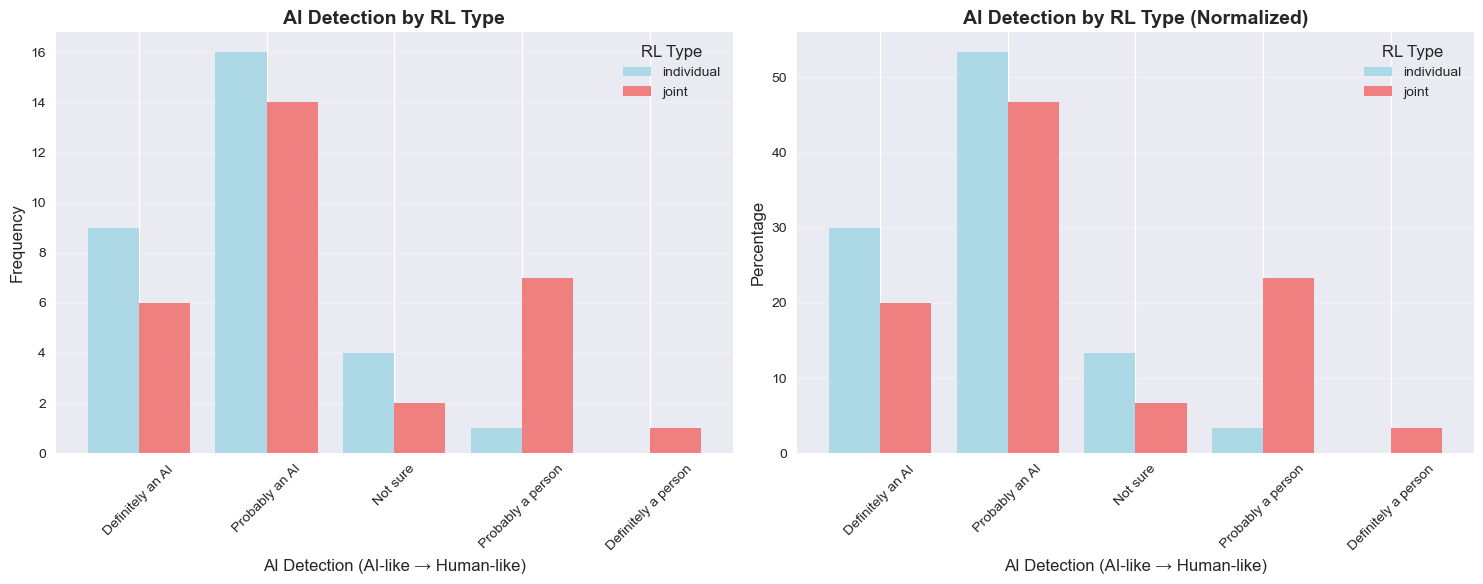

=== AI DETECTION SUMMARY ===

JOINT RL (n=30):
  Probably an AI: 14 (46.7%)
  Probably a person: 7 (23.3%)
  Definitely an AI: 6 (20.0%)
  Not sure: 2 (6.7%)
  Definitely a person: 1 (3.3%)

INDIVIDUAL RL (n=30):
  Probably an AI: 16 (53.3%)
  Definitely an AI: 9 (30.0%)
  Not sure: 4 (13.3%)
  Probably a person: 1 (3.3%)


In [49]:
# Create AI Detection comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Prepare data for plotting
ai_data = questionnaire_df.groupby(['rl_type', 'ai_detection_cat'], observed=True).size().unstack(fill_value=0)

# Plot 1: Side-by-side bars using the new color scheme
ai_data.T.plot(kind='bar', ax=ax1, width=0.8, color=[colors['individual'], colors['joint']])
ax1.set_title('AI Detection by RL Type', fontsize=14, fontweight='bold')
ax1.set_xlabel('AI Detection (AI-like → Human-like)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.legend(title='RL Type', title_fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Normalized percentages using the new color scheme
ai_data_norm = ai_data.div(ai_data.sum(axis=1), axis=0) * 100
ai_data_norm.T.plot(kind='bar', ax=ax2, width=0.8, color=[colors['individual'], colors['joint']])
ax2.set_title('AI Detection by RL Type (Normalized)', fontsize=14, fontweight='bold')
ax2.set_xlabel('AI Detection (AI-like → Human-like)', fontsize=12)
ax2.set_ylabel('Percentage', fontsize=12)
ax2.legend(title='RL Type', title_fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
# plt.savefig('individual_vs_joint_rl_ai_detection.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("=== AI DETECTION SUMMARY ===")
for rl_type in questionnaire_df['rl_type'].unique():
    subset = questionnaire_df[questionnaire_df['rl_type'] == rl_type]
    print(f"\n{rl_type.upper()} RL (n={len(subset)}):")
    counts = subset['ai_detection'].value_counts()
    for category, count in counts.items():
        percentage = (count / len(subset)) * 100
        print(f"  {category}: {count} ({percentage:.1f}%)")

## Collaboration Rating Analysis: Individual vs Joint RL

X-axis: **Poor → Excellent**  
Y-axis: **Frequency**


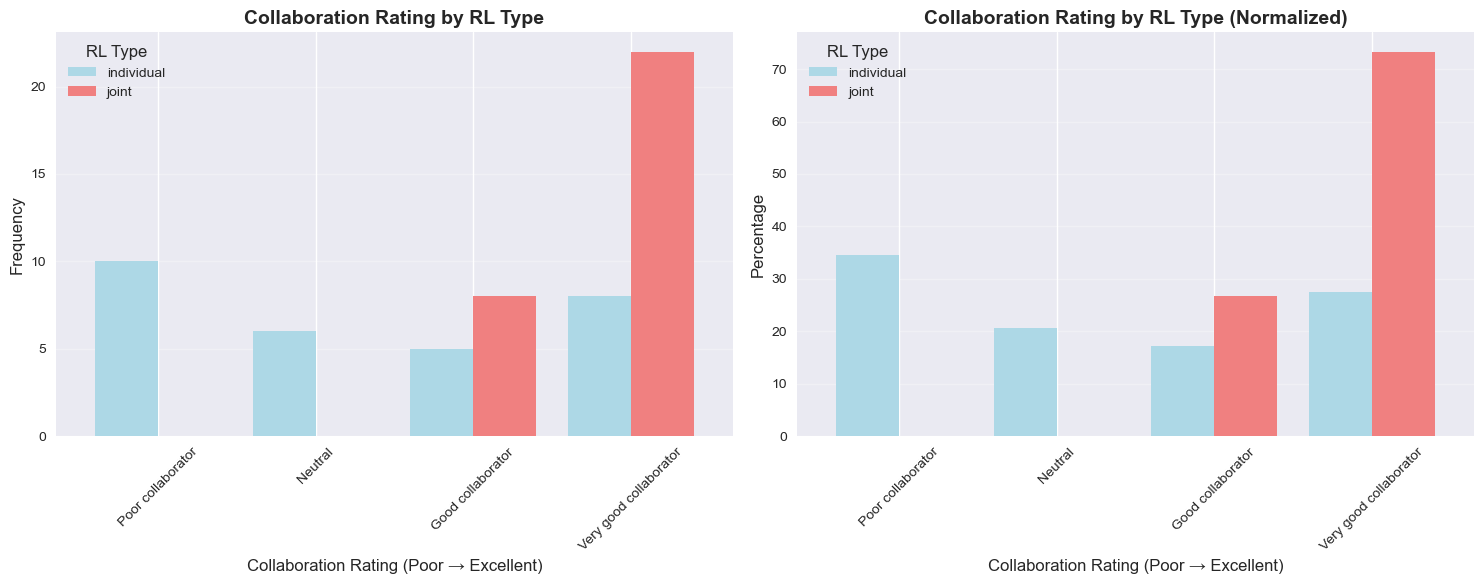

=== COLLABORATION RATING SUMMARY ===

JOINT RL (n=30):
  Very good collaborator: 22 (73.3%)
  Good collaborator: 8 (26.7%)

INDIVIDUAL RL (n=30):
  Poor collaborator: 10 (33.3%)
  Very good collaborator: 8 (26.7%)
  Neutral: 6 (20.0%)
  Good collaborator: 5 (16.7%)
  Very poor collaborator: 1 (3.3%)


In [50]:
# Create Collaboration Rating comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Prepare data for plotting
collab_data = questionnaire_df.groupby(['rl_type', 'collaboration_rating_cat'], observed=True).size().unstack(fill_value=0)

# Plot 1: Side-by-side bars using the new color scheme
collab_data.T.plot(kind='bar', ax=ax1, width=0.8, color=[colors['individual'], colors['joint']])
ax1.set_title('Collaboration Rating by RL Type', fontsize=14, fontweight='bold')
ax1.set_xlabel('Collaboration Rating (Poor → Excellent)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.legend(title='RL Type', title_fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Normalized percentages using the new color scheme
collab_data_norm = collab_data.div(collab_data.sum(axis=1), axis=0) * 100
collab_data_norm.T.plot(kind='bar', ax=ax2, width=0.8, color=[colors['individual'], colors['joint']])
ax2.set_title('Collaboration Rating by RL Type (Normalized)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Collaboration Rating (Poor → Excellent)', fontsize=12)
ax2.set_ylabel('Percentage', fontsize=12)
ax2.legend(title='RL Type', title_fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
# plt.savefig('individual_vs_joint_rl_collaboration_rating.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("=== COLLABORATION RATING SUMMARY ===")
for rl_type in questionnaire_df['rl_type'].unique():
    subset = questionnaire_df[questionnaire_df['rl_type'] == rl_type]
    print(f"\n{rl_type.upper()} RL (n={len(subset)}):")
    counts = subset['collaboration_rating'].value_counts()
    for category, count in counts.items():
        percentage = (count / len(subset)) * 100
        print(f"  {category}: {count} ({percentage:.1f}%)")

## Final Summary and Key Findings


In [51]:
# Generate comprehensive summary with statistical tests for all variables
print("🎯 === COMPREHENSIVE QUESTIONNAIRE ANALYSIS SUMMARY === 🎯")
print(f"Total responses analyzed: {len(questionnaire_df)}")

# Sample distribution
rl_distribution = questionnaire_df['rl_type'].value_counts()
print(f"\n📊 Sample Distribution:")
for rl_type, count in rl_distribution.items():
    percentage = (count / len(questionnaire_df)) * 100
    print(f"  {rl_type.title()} RL: {count} participants ({percentage:.1f}%)")

# Key findings for each variable
print(f"\n🔍 === KEY FINDINGS ===")

# AI Detection findings
print(f"\n1️⃣ AI DETECTION:")
for rl_type in ['individual', 'joint']:
    subset = questionnaire_df[questionnaire_df['rl_type'] == rl_type]
    ai_like_count = len(subset[subset['ai_detection'].isin(['Definitely an AI', 'Probably an AI'])])
    total = len(subset)
    percentage = (ai_like_count / total) * 100
    print(f"   📈 {rl_type.title()} RL: {ai_like_count}/{total} ({percentage:.1f}%) detected as AI-like")

# Collaboration findings
print(f"\n2️⃣ COLLABORATION RATING:")
for rl_type in ['individual', 'joint']:
    subset = questionnaire_df[questionnaire_df['rl_type'] == rl_type]
    good_collab_count = len(subset[subset['collaboration_rating'].isin(['Very good collaborator', 'Good collaborator'])])
    total = len(subset)
    percentage = (good_collab_count / total) * 100
    print(f"   🤝 {rl_type.title()} RL: {good_collab_count}/{total} ({percentage:.1f}%) rated as good/very good collaborator")

# Play again findings
print(f"\n3️⃣ PLAY AGAIN INTENTION:")
for rl_type in ['individual', 'joint']:
    subset = questionnaire_df[questionnaire_df['rl_type'] == rl_type]
    positive_count = len(subset[subset['play_again'].isin(['Definitely play again', 'Probably play again'])])
    total = len(subset)
    percentage = (positive_count / total) * 100
    print(f"   🎮 {rl_type.title()} RL: {positive_count}/{total} ({percentage:.1f}%) would play again")

# Comprehensive statistical tests for all three variables
from scipy.stats import chi2_contingency

print(f"\n📈 === COMPREHENSIVE STATISTICAL ANALYSIS ===")

# Test 1: AI Detection
contingency_ai = pd.crosstab(questionnaire_df['rl_type'], questionnaire_df['ai_detection'])
chi2_ai, p_value_ai, dof_ai, expected_ai = chi2_contingency(contingency_ai)
print(f"\n🔍 AI DETECTION:")
print(f"   Chi-square test: χ² = {chi2_ai:.3f}, p = {p_value_ai:.3f}")
if p_value_ai < 0.05:
    print(f"   ✅ SIGNIFICANT: Joint RL agents are perceived as more human-like!")
else:
    print(f"   ❌ Not statistically significant (p = {p_value_ai:.3f})")

# Test 2: Collaboration Rating
contingency_collab = pd.crosstab(questionnaire_df['rl_type'], questionnaire_df['collaboration_rating'])
chi2_collab, p_value_collab, dof_collab, expected_collab = chi2_contingency(contingency_collab)
print(f"\n🤝 COLLABORATION RATING:")
print(f"   Chi-square test: χ² = {chi2_collab:.3f}, p = {p_value_collab:.3f}")
if p_value_collab < 0.05:
    print(f"   ✅ SIGNIFICANT: Joint RL agents are perceived as significantly better collaborators!")
else:
    print(f"   ❌ Not statistically significant (p = {p_value_collab:.3f})")

# Test 3: Play Again Intention
contingency_play = pd.crosstab(questionnaire_df['rl_type'], questionnaire_df['play_again'])
chi2_play, p_value_play, dof_play, expected_play = chi2_contingency(contingency_play)
print(f"\n🎮 PLAY AGAIN INTENTION:")
print(f"   Chi-square test: χ² = {chi2_play:.3f}, p = {p_value_play:.3f}")
if p_value_play < 0.05:
    print(f"   ✅ SIGNIFICANT: There is a significant difference in play again intention!")
else:
    print(f"   ❌ Not statistically significant (p = {p_value_play:.3f})")

# Summary of significant findings
significant_vars = []
if p_value_ai < 0.05:
    significant_vars.append("AI Detection")
if p_value_collab < 0.05:
    significant_vars.append("Collaboration Rating")
if p_value_play < 0.05:
    significant_vars.append("Play Again Intention")

print(f"\n🎯 === OVERALL SUMMARY ===")
if significant_vars:
    print(f"✅ Significant differences found in: {', '.join(significant_vars)}")
    print(f"🔑 Joint RL agents consistently outperform Individual RL agents in user perception!")
else:
    print(f"❌ No significant differences found between RL agent types")

# Save comprehensive results
output_file = 'comprehensive_questionnaire_analysis.csv'
analysis_cols = ['file_id', 'rl_type', 'ai_detection', 'collaboration_rating', 'play_again']

# Save detailed results with statistical test summary
results_summary = {
    'Variable': ['AI Detection', 'Collaboration Rating', 'Play Again Intention'],
    'Chi2_Statistic': [chi2_ai, chi2_collab, chi2_play],
    'P_Value': [p_value_ai, p_value_collab, p_value_play],
    'Significant': [p_value_ai < 0.05, p_value_collab < 0.05, p_value_play < 0.05]
}

results_df = pd.DataFrame(results_summary)
results_df.to_csv('questionnaire_statistical_tests.csv', index=False)

questionnaire_df[analysis_cols].to_csv(output_file, index=False)

print(f"\n💾 Results saved to:")
print(f"   - {output_file} (detailed questionnaire data)")
print(f"   - questionnaire_statistical_tests.csv (statistical test results)")

# Display statistical test summary
print(f"\n📊 Statistical Test Summary:")
print(results_df.to_string(index=False))

🎯 === COMPREHENSIVE QUESTIONNAIRE ANALYSIS SUMMARY === 🎯
Total responses analyzed: 60

📊 Sample Distribution:
  Joint RL: 30 participants (50.0%)
  Individual RL: 30 participants (50.0%)

🔍 === KEY FINDINGS ===

1️⃣ AI DETECTION:
   📈 Individual RL: 25/30 (83.3%) detected as AI-like
   📈 Joint RL: 20/30 (66.7%) detected as AI-like

2️⃣ COLLABORATION RATING:
   🤝 Individual RL: 13/30 (43.3%) rated as good/very good collaborator
   🤝 Joint RL: 30/30 (100.0%) rated as good/very good collaborator

3️⃣ PLAY AGAIN INTENTION:
   🎮 Individual RL: 18/30 (60.0%) would play again
   🎮 Joint RL: 23/30 (76.7%) would play again

📈 === COMPREHENSIVE STATISTICAL ANALYSIS ===

🔍 AI DETECTION:
   Chi-square test: χ² = 6.900, p = 0.141
   ❌ Not statistically significant (p = 0.141)

🤝 COLLABORATION RATING:
   Chi-square test: χ² = 24.226, p = 0.000
   ✅ SIGNIFICANT: Joint RL agents are perceived as significantly better collaborators!

🎮 PLAY AGAIN INTENTION:
   Chi-square test: χ² = 10.841, p = 0.028
   

In [52]:
<cell_type>markdown</cell_type>## Play Again Intention Analysis: Individual vs Joint RL

X-axis: **Negative → Positive**
Y-axis: **Frequency**

SyntaxError: invalid character '→' (U+2192) (1590341658.py, line 3)

In [ ]:
# Create Play Again Intention comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Prepare data for plotting
play_again_data = questionnaire_df.groupby(['rl_type', 'play_again_cat'], observed=True).size().unstack(fill_value=0)

# Plot 1: Side-by-side bars using the new color scheme
play_again_data.T.plot(kind='bar', ax=ax1, width=0.8, color=[colors['individual'], colors['joint']])
ax1.set_title('Play Again Intention by RL Type', fontsize=14, fontweight='bold')
ax1.set_xlabel('Play Again Intention (Negative → Positive)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.legend(title='RL Type', title_fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Normalized percentages using the new color scheme
play_again_data_norm = play_again_data.div(play_again_data.sum(axis=1), axis=0) * 100
play_again_data_norm.T.plot(kind='bar', ax=ax2, width=0.8, color=[colors['individual'], colors['joint']])
ax2.set_title('Play Again Intention by RL Type (Normalized)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Play Again Intention (Negative → Positive)', fontsize=12)
ax2.set_ylabel('Percentage', fontsize=12)
ax2.legend(title='RL Type', title_fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
# plt.savefig('individual_vs_joint_rl_play_again.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("=== PLAY AGAIN INTENTION SUMMARY ===")
for rl_type in questionnaire_df['rl_type'].unique():
    subset = questionnaire_df[questionnaire_df['rl_type'] == rl_type]
    print(f"\n{rl_type.upper()} RL (n={len(subset)}):")
    counts = subset['play_again'].value_counts()
    for category, count in counts.items():
        percentage = (count / len(subset)) * 100
        print(f"  {category}: {count} ({percentage:.1f}%)")

# Statistical test for play again intention
from scipy.stats import chi2_contingency, mannwhitneyu
contingency_table_play = pd.crosstab(questionnaire_df['rl_type'], questionnaire_df['play_again'])
chi2_play, p_value_play, dof_play, expected_play = chi2_contingency(contingency_table_play)

print(f"\n📈 === PLAY AGAIN STATISTICAL TEST ===")
print(f"Play Again Chi-square test: χ² = {chi2_play:.3f}, p = {p_value_play:.3f}")
if p_value_play < 0.05:
    print(f"✅ SIGNIFICANT: There is a significant difference in play again intention between RL types!")
else:
    print(f"❌ Not statistically significant (p = {p_value_play:.3f})")

# Calculate positive intention rates
for rl_type in ['individual', 'joint']:
    subset = questionnaire_df[questionnaire_df['rl_type'] == rl_type]
    positive_count = len(subset[subset['play_again'].isin(['Definitely play again', 'Probably play again'])])
    total = len(subset)
    percentage = (positive_count / total) * 100
    print(f"   🎮 {rl_type.title()} RL: {positive_count}/{total} ({percentage:.1f}%) positive intention to play again")